reference: https://towardsdatascience.com/how-to-solve-an-ode-with-a-neural-network-917d11918932

In [46]:
from jax import vmap, grad, jit, random
import jax.numpy as np
import matplotlib.pyplot as plt

In [47]:
def sigmoid(x):
    return 1./(1. + np.exp(-x))

def f(params, x):
    w0 = params[:10]
    b0 = params[10:20]
    w1 = params[20:30]
    b1 = params[30]
    x = sigmoid(x*w0 + b0)
    x = sigmoid(np.sum(x*w1) + b1)
    return x

In [48]:
f_vect = vmap(f, (None, 0))
g_vect = vmap(grad(f, 1), (None, 0))

key = random.PRNGKey(0)
params = random.normal(key, shape=(31,))

dfdx = grad(f, 1)

inputs = np.linspace(-2., 2., num=401)

dfdx_vect = vmap(dfdx, (None, 0))

In [49]:
@jit
def loss(params, inputs):
    eq = dfdx_vect(params, inputs) + 2.*inputs*f_vect(params, inputs)
    ic = f(params, 0.) - 1.
    return np.mean(eq**2) + ic**2

In [50]:
grad_loss = jit(grad(loss, 0))

In [51]:
epochs = 1000
learning_rate = 0.1
momentum = 0.99
velocity = 0.

for epoch in range(epochs):
    if epoch % 100 == 0:
        print('epoch: %3d loss: %.6f' % (epoch, loss(params, inputs)))
    gradient = grad_loss(params + momentum*velocity, inputs)
    velocity = momentum*velocity - learning_rate*gradient
    params += velocity

epoch:   0 loss: 0.954726
epoch: 100 loss: 0.061131
epoch: 200 loss: 0.024128
epoch: 300 loss: 0.008868
epoch: 400 loss: 0.003202
epoch: 500 loss: 0.001567
epoch: 600 loss: 0.000880
epoch: 700 loss: 0.000505
epoch: 800 loss: 0.000306
epoch: 900 loss: 0.000224


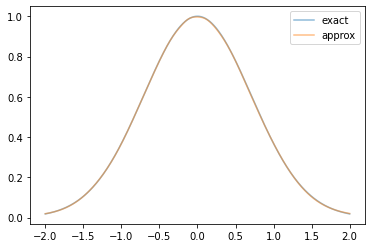

In [56]:
plt.plot(inputs, np.exp(-inputs**2), alpha=0.5, label='exact')
plt.plot(inputs, f_vect(params, inputs), alpha=0.5, label='approx')
plt.legend()
plt.show()